 # MACHINE LEARNING PROJECT

### 1. Import libraries

In [1]:
# Import all libraries used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### 2. Load the dataset

In [2]:
# Read the mixed_playlist data
data = pd.read_csv('data/mixed_playlist.csv')
# Create a copy of the data frame for the second part (predicting the year)
data_copy = data.copy()
# Print the data to check if it has been uploaded correctly
data.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2022,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2020,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2018,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2020,alpha


In [3]:
#Read the data from each year for each user
users = ['alpha', 'beta', 'delta', 'epsilon', 'gamma', 'zeta']

# Function to read CSV files for each user and saves the information in a dictionary
def read_user_databases(user):
    user_data = {}
    for year in range(2016, 2023):
        file_path = f"data/recovered_data/user_{user}/user_{user}_{year}.csv"
        try:
            df = pd.read_csv(file_path)  # Read CSV file for each year
            user_data[year] = df  # Store DataFrame in a dictionary using year as key
        except FileNotFoundError:
            print(f"File not found for {user} in year {year}")
    return user_data

# Read databases for all users
all_users_data = {}
for user in users:
    all_users_data[user] = read_user_databases(user)


File not found for zeta in year 2016
File not found for zeta in year 2017
File not found for zeta in year 2018
File not found for zeta in year 2019


### 3. Exploratory Data Analysis

In [4]:
#Description of the data
data.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
count,3.899000e+03,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,2.438545e+05,31.931521,0.425282,0.554342,0.522426,0.298067,0.167223,-10.454061,0.085069,115.836808,0.384133,3.873044,5.298025,0.467556,2008.102077
std,1.051106e+05,24.938656,0.363239,0.192042,0.265516,0.387045,0.143566,6.221795,0.092619,28.683508,0.254657,0.467562,3.505024,0.499010,97.161336
min,0.000000e+00,0.000000,0.000001,0.000000,0.000545,0.000000,0.017900,-42.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878725e+05,1.000000,0.057900,0.424000,0.312000,0.000004,0.094500,-12.837500,0.036800,94.554500,0.160000,4.000000,2.000000,0.000000,2012.000000
50%,2.241330e+05,34.000000,0.339000,0.575000,0.547000,0.005820,0.112000,-8.599000,0.047000,115.241000,0.355000,4.000000,5.000000,0.000000,2016.000000
75%,2.743165e+05,51.000000,0.793000,0.700000,0.738000,0.774000,0.172000,-6.225000,0.086500,131.984500,0.572000,4.000000,8.000000,1.000000,2018.000000
max,1.921683e+06,91.000000,0.996000,0.971000,0.995000,0.995000,0.991000,0.532000,0.952000,209.596000,0.981000,5.000000,11.000000,1.000000,2022.000000


In [5]:
#Columns name of the data
data.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode', 'uri', 'release_year', 'top_year',
       'user'],
      dtype='object')

In [6]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3890 non-null   object 
 1   album             3890 non-null   object 
 2   artist            3899 non-null   object 
 3   release_date      3899 non-null   object 
 4   length            3899 non-null   int64  
 5   popularity        3899 non-null   int64  
 6   acousticness      3899 non-null   float64
 7   danceability      3899 non-null   float64
 8   energy            3899 non-null   float64
 9   instrumentalness  3899 non-null   float64
 10  liveness          3899 non-null   float64
 11  loudness          3899 non-null   float64
 12  speechiness       3899 non-null   float64
 13  tempo             3899 non-null   float64
 14  valence           3899 non-null   float64
 15  time_signature    3899 non-null   int64  
 16  key               3899 non-null   int64  


### 4. Pre-processing data

In [7]:
# Calculate total length for each year from 2016 to 2022 across all users
for year in range(2016, 2023):
    total_length_for_year = 0

    for user_data in all_users_data.values():
        if year in user_data:
            total_length_for_year += len(user_data[year])

    print(f"Total length of all DataFrames for year {year}: {total_length_for_year}")
print(f"Total length of the mixed_playlist: {len(data)}")


Total length of all DataFrames for year 2016: 500
Total length of all DataFrames for year 2017: 500
Total length of all DataFrames for year 2018: 500
Total length of all DataFrames for year 2019: 500
Total length of all DataFrames for year 2020: 600
Total length of all DataFrames for year 2021: 600
Total length of all DataFrames for year 2022: 599
Total length of the mixed_playlist: 3899


As we can see there is in total 3799 data across all users, so this means there are 100 songs that need to be assigned to one user and one year.

In [8]:
import itertools

# Generate combinations of all databases
databases = list(all_users_data.values())
combinations = list(itertools.combinations(databases, 2))  # Generate all possible combinations of 2 databases

columns_to_compare = ['name', 'album']  # Adjust this list to include the columns you want to compare

all_different = True

# Iterate through combinations and check if selected columns in DataFrames are equal for any pair of databases
for combination in combinations:
    db1 = combination[0]
    db2 = combination[1]

    for year in range(2016, 2023):
        for user in db1.keys():
            if year in db1[user] and year in db2[user]:
                for col in columns_to_compare:
                    if not db1[user][year][col].equals(db2[user][year][col]):
                        all_different = False
                        break  # Exit the loop if any pair of selected columns are found to be equal
                if not all_different:
                    break  # Exit the loop if any pair of selected columns are found to be equal
            else:
                break
        if not all_different:
            break  # Exit the loop if any pair of selected columns are found to be equal

# Print the result
print(f"All selected columns across databases are different: {all_different}")


All selected columns across databases are different: True


Every user has different songs for every year. Threre are no repeated songs in the playlists.

In [9]:
# drop NA values 
data.dropna(inplace=True)

# Remove duplicates for the mixed_playlist
data.drop_duplicates(inplace=True)

In [10]:
# display the correlation matrix between numeric variables
corr = data.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
length,1.000000,-0.095778,0.008084,-0.127551,-0.025353,0.167989,-0.012509,-0.068962,-0.034922,-0.003108,-0.196198,-0.022935,-0.026509,0.018351,-0.134845
popularity,-0.095778,1.000000,-0.031509,0.059946,0.049723,-0.130595,-0.053254,0.095984,0.039325,0.022408,0.034127,-0.013934,0.004505,-0.008735,0.018521
acousticness,0.008084,-0.031509,1.000000,-0.385444,-0.798956,0.162717,-0.117861,-0.687930,-0.163548,-0.186733,-0.269486,-0.225857,-0.040868,-0.015164,-0.194875
danceability,-0.127551,0.059946,-0.385444,1.000000,0.420514,-0.371324,0.007528,0.489464,0.251072,0.084840,0.573392,0.242710,0.024031,-0.015608,0.122784
energy,-0.025353,0.049723,-0.798956,0.420514,1.000000,-0.213813,0.159955,0.827191,0.231906,0.207848,0.421881,0.229822,0.052760,-0.020345,0.202885
instrumentalness,0.167989,-0.130595,0.162717,-0.371324,-0.213813,1.000000,-0.091761,-0.411712,-0.256962,-0.035070,-0.406999,-0.113168,-0.000749,0.004310,0.012387
liveness,-0.012509,-0.053254,-0.117861,0.007528,0.159955,-0.091761,1.000000,0.094756,0.111869,0.037562,0.114983,-0.013365,0.008331,0.006810,-0.025395
loudness,-0.068962,0.095984,-0.687930,0.489464,0.827191,-0.411712,0.094756,1.000000,0.191954,0.184608,0.427839,0.235093,0.039274,-0.004652,0.231031
speechiness,-0.034922,0.039325,-0.163548,0.251072,0.231906,-0.256962,0.111869,0.191954,1.000000,0.036541,0.251278,0.067980,0.017940,-0.033553,0.097864
tempo,-0.003108,0.022408,-0.186733,0.084840,0.207848,-0.035070,0.037562,0.184608,0.036541,1.000000,0.089364,0.006859,0.019397,-0.057531,0.038121


There is strong correlation between loudness and energy, so fo this case loudness will be removed from the dataframe

In [11]:
#remove the  loudness feature 
data.drop(columns = 'loudness', inplace = True)
data.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2022,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2020,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2018,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2020,alpha


In [12]:
#Create a new object LabelEncoder
label_encoder = LabelEncoder()

# Use the label encoder to encode name, artiste and albums in order to use it in the classification
data['name'] = label_encoder.fit_transform(data['name'])
data['artist'] = label_encoder.fit_transform(data['artist'])
data['album'] = label_encoder.fit_transform(data['album'])

#Show the first rows 
data.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,2825,1732,682,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,1279,858,543,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2022,delta
2,1655,1316,274,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2020,gamma
3,1592,1373,661,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2018,gamma
4,971,1990,169,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2020,alpha


In [13]:
#Remove extreme outliers
Q1 = data.quantile(0.05, numeric_only=True)
Q3 = data.quantile(0.95, numeric_only=True)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR
def remove_outliers(col):
    global data
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


# Remove outliers from each numerical column
for col in ['name','artist','album','length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode']:
    remove_outliers(col)


Now, we are going separate the known and unknown data in two diferent dataframes

In [14]:
# Filter out rows with 'unknown' in the 'user' column
unkown_data= data[data['user'] == 'unknown']
known_data = data[data['user'] != 'unknown']

In this case, a new column will be created and this will merge the 'user' and 'top_year' columns, to have all possible targets

In [15]:
known_data = known_data.copy()

# Replace NaN values in 'user' column with empty string
known_data['user'].fillna('', inplace=True)  

# Replace NaN values in 'top_year' column with empty string
known_data['top_year'].fillna('', inplace=True)  

In [16]:
#Create the target series
target_TopYear = pd.Series(known_data["top_year"])
target_user = pd.Series(known_data["user"])

#Create the feature_df
# I keep only the numerical values        
feature_df = known_data.drop(columns = ['release_date','uri','top_year','user'])
feature_df.head()

,name,album,artist,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,time_signature,key,mode,release_year
1,1279,858,543,172626,62,0.6220,0.615,0.599,0.000008,0.192,0.2530,86.976,0.626,4,1,1,2018
2,1655,1316,274,175269,72,0.4130,0.834,0.734,0.000040,0.113,0.3410,89.989,0.356,4,6,0,2019
3,1592,1373,661,175266,0,0.4040,0.797,0.506,0.000153,0.255,0.0327,128.027,0.539,4,5,0,2018
4,971,1990,169,264735,53,0.0616,0.788,0.675,0.711000,0.100,0.0318,107.993,0.525,4,7,0,2016
5,2435,1571,747,256906,0,0.4190,0.677,0.298,0.080200,0.108,0.0501,143.219,0.552,4,2,0,2017


In [17]:
# Create the target labels for topYear
year_mapping = {'2016': 0, '2017': 1, '2018': 2, '2019': 3, '2020': 4, '2021': 5, '2022': 6}
target_TopYear.replace(year_mapping, inplace=True)

# Create the target labels for user
user_mapping = {'alpha': 0, 'beta': 1, 'delta': 2, 'epsilon': 3, 'gamma': 4, 'dzeta': 5}
target_user.replace(user_mapping, inplace=True)

### 5. Apply models to see which one fits the best for User

In [18]:
# Split the dataset into testing and training part
X_train_User, X_test_User, y_train_User, y_test_User = train_test_split(
    feature_df.values,
    target_user.values,
    train_size = 0.7,
    shuffle = True,
)

## MULTI-CLASS LOGISTIC REGRESSION

In [19]:
param_dict_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'lr__penalty': ['l1', 'l2'],  # Type of regularization used
    'lr__solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2
    'select__k': range(1, 18)  # Parameter for SelectKBest
}

clf_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('lr', LogisticRegression())
])


In [20]:
grid_clf_lr = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_dict_lr,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=1,
    error_score='raise'
)

grid_clf_lr.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 340 candidates, totalling 1020 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x174479d00>)),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga'],
                         'select__k': range(1, 18)},
             scoring='f1_weighted', verbose=1)

In [21]:
# Predict categories for testing dataset LR
y_pred_lr = grid_clf_lr.predict(X_test_User)
y_pred_proba_lr = grid_clf_lr.predict_proba(X_test_User)

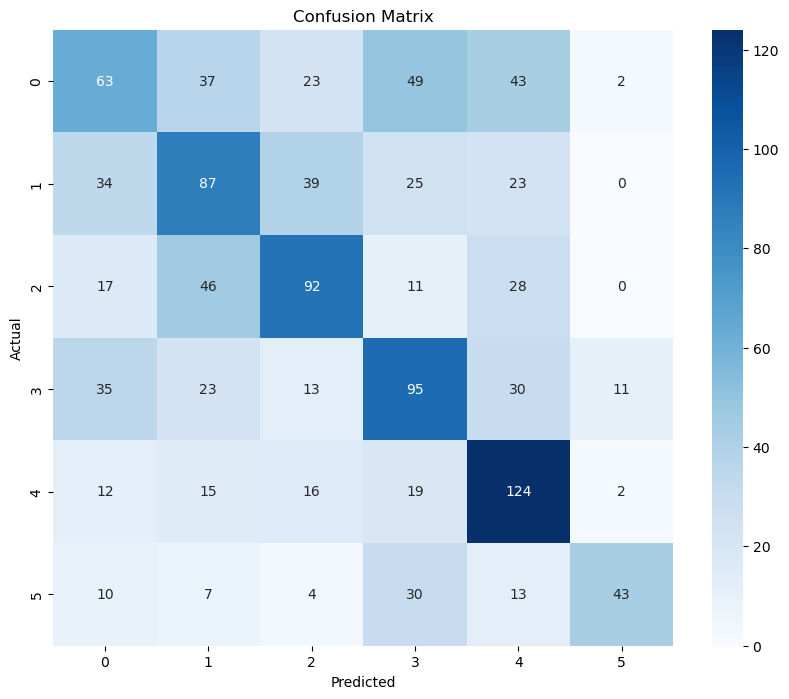

In [22]:
# Compute and visualize the confusion matrix LR
cm_lr = confusion_matrix(y_test_User, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Classification report Multi-Class Logistic Regression : ")
print(classification_report(y_test_User, y_pred_lr))

Classification report Multi-Class Logistic Regression : 
              precision    recall  f1-score   support

           0       0.37      0.29      0.32       217
           1       0.40      0.42      0.41       208
           2       0.49      0.47      0.48       194
           3       0.41      0.46      0.44       207
           4       0.48      0.66      0.55       188
           5       0.74      0.40      0.52       107

    accuracy                           0.45      1121
   macro avg       0.48      0.45      0.45      1121
weighted avg       0.46      0.45      0.45      1121



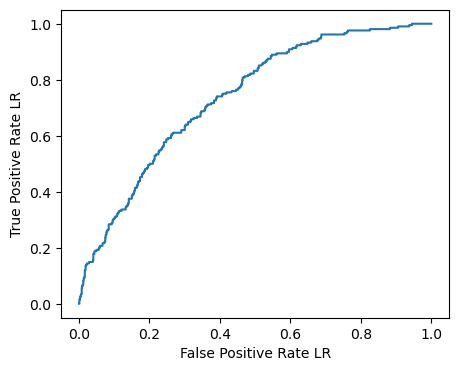

In [24]:
# Compute ROC curve LR
fpr_lr, tpr_lr, thresholds_lr = roc_curve(
    y_test_User, # the true class
    y_pred_proba_lr[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve LR
plt.figure(figsize = [5, 4])
plt.plot(fpr_lr, tpr_lr, '-')
plt.xlabel('False Positive Rate LR')
plt.ylabel('True Positive Rate LR')
plt.show()


## K NEAREST NEIGHBORS

In [25]:
param_dict_knn = {
    'knn__n_neighbors': range(3,32,2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'select__k': range(6,18),  # Parameter for SelectKBest
}

# construct the pipeline
clf_knn = Pipeline([
    ('standard scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('knn', KNeighborsClassifier())
])


In [26]:
# Perform grid search with cross-validation KNN
max_iter=999
grid_clf_knn = RandomizedSearchCV(
    estimator=clf_knn,
    param_distributions=param_dict_knn,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=1
)

grid_clf_knn.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 999 candidates, totalling 2997 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standard scaler',
                                              StandardScaler()),
                                             ('select',
                                              SelectKBest(score_func=<function f_regression at 0x174479d00>)),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=999,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': range(3, 32, 2),
                                        'knn__weights': ['uniform', 'distance'],
                                        'select__k': range(6, 18)},
                   scoring='f1_weighted', verbose=1)

In [27]:
# Check the best estimator and the best score
print("Result KNN: ")
print('Best hyper-parameters KNN:', grid_clf_knn.best_params_)
print('Best score KNN:', grid_clf_knn.best_score_)

Result KNN: 
Best hyper-parameters KNN: {'select__k': 17, 'knn__weights': 'distance', 'knn__n_neighbors': 17, 'knn__metric': 'manhattan'}
Best score KNN: 0.5496742818479551


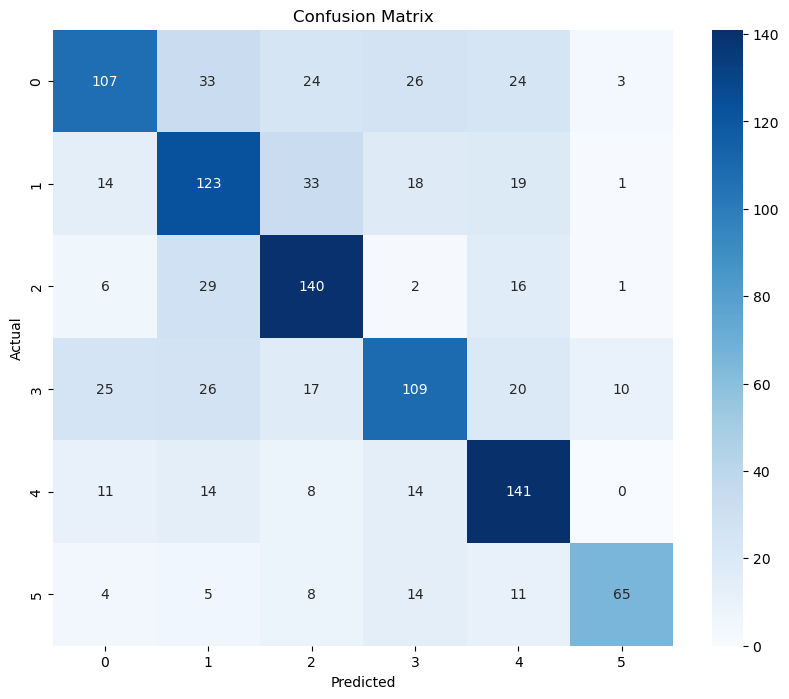

In [28]:
# Predict categories for testing dataset KNN
y_pred_knn = grid_clf_knn.predict(X_test_User)
y_pred_proba_knn = grid_clf_knn.predict_proba(X_test_User)

# compute and visualize the confusion matrix KNN
cm_knn = confusion_matrix(y_test_User, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# get all metrics using `classification_report`
print("Classification report KNN : ")
print(classification_report(y_test_User, y_pred_knn))

Classification report KNN : 
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       217
           1       0.53      0.59      0.56       208
           2       0.61      0.72      0.66       194
           3       0.60      0.53      0.56       207
           4       0.61      0.75      0.67       188
           5       0.81      0.61      0.70       107

    accuracy                           0.61      1121
   macro avg       0.63      0.62      0.62      1121
weighted avg       0.62      0.61      0.61      1121



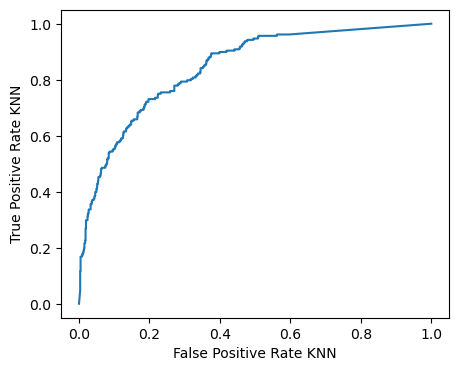

In [30]:
# Compute ROC curve KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(
    y_test_User, # the true class
    y_pred_proba_knn[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve KNN
plt.figure(figsize = [5, 4])
plt.plot(fpr_knn, tpr_knn, '-')
plt.xlabel('False Positive Rate KNN')
plt.ylabel('True Positive Rate KNN')
plt.show()

## SUPPORT VECTOR CLASSIFIER

In [31]:
param_dict_svc = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'select__k': range(1,18),  # Parameter for SelectKBest
}

clf_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('svc', SVC())
])


In [32]:
grid_clf_svc = GridSearchCV(
    estimator=clf_svc,
    param_grid=param_dict_svc,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=1
)

grid_clf_svc.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 340 candidates, totalling 1020 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x174479d00>)),
                                       ('svc', SVC())]),
             param_grid={'select__k': range(1, 18),
                         'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=1)

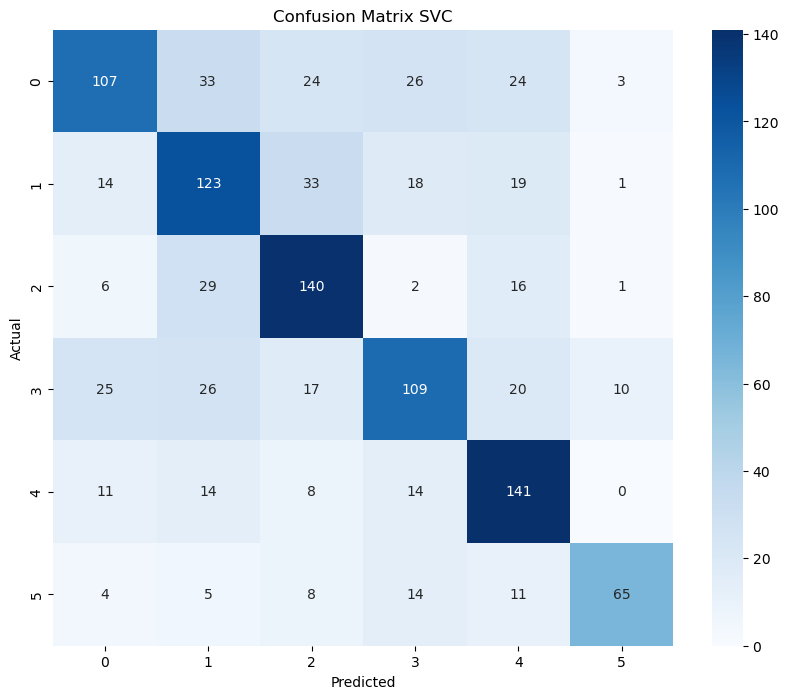

In [33]:
# Predict categories for testing dataset SVC
y_pred_svc = grid_clf_svc.predict(X_test_User)

#Plot the confusion Matrix
cm_svc = confusion_matrix(y_test_User, y_pred_svc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')
plt.show()

In [34]:
print("Classification report SVC : ")
print(classification_report(y_test_User, y_pred_svc))

Classification report SVC : 
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       217
           1       0.53      0.51      0.52       208
           2       0.62      0.66      0.64       194
           3       0.54      0.50      0.52       207
           4       0.62      0.66      0.64       188
           5       0.80      0.61      0.69       107

    accuracy                           0.57      1121
   macro avg       0.60      0.58      0.58      1121
weighted avg       0.58      0.57      0.57      1121



## DECISION TREES

In [35]:
param_dict_dt = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': range(1,30,2),
    'dt__min_samples_split': range(1,20),
    'dt__min_samples_leaf' :range(1,10),
    'dt__max_features': ["auto", "sqrt", "log2"],
    'dt__min_impurity_decrease':[0.0,0.1,0.2],
    'select__k': range(6, 18)  # Paramètre pour SelectKBest
}

clf_dt = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('dt', DecisionTreeClassifier())
])

In [36]:

grid_clf_dt = RandomizedSearchCV(
    estimator=clf_dt,
    param_distributions=param_dict_dt,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=1
)

grid_clf_dt.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 999 candidates, totalling 2997 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1128 fits failed out of a total of 2997.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1008 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklear

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x174479d00>)),
                                             ('dt', DecisionTreeClassifier())]),
                   n_iter=999,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': range(1, 30, 2),
                                        'dt__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'dt__min_impurity_decrease': [0.0, 0.1,
                                                                      0.2],
                                        'dt__min_samples_leaf': range(1, 10),
                                        'dt__min_samples_split': range(1, 20),
                                        'select__k': range(6, 18)},
                   scoring='f1_weighted', verbose=1)

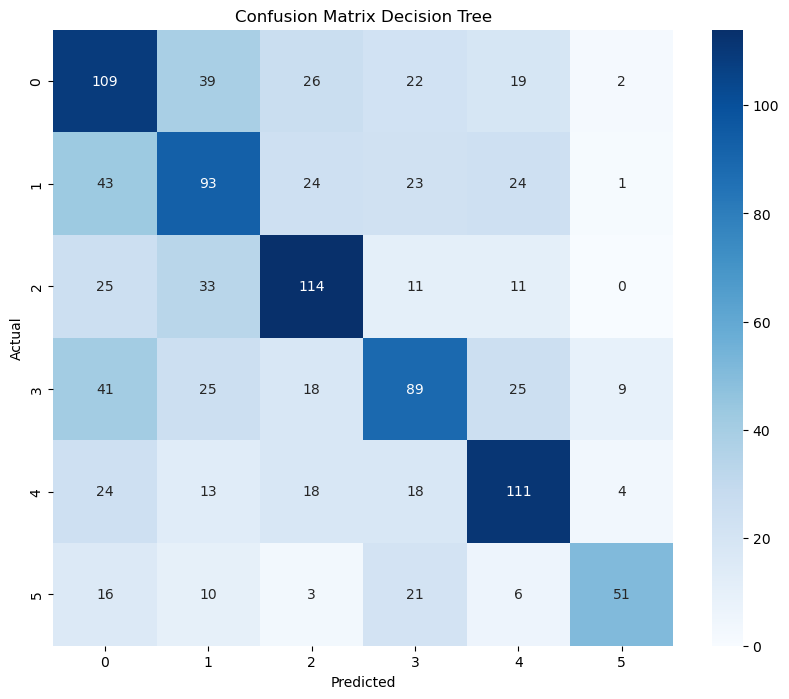

In [37]:
# Predict categories for testing dataset DT
y_pred_dt = grid_clf_dt.predict(X_test_User)
y_pred_proba_dt = grid_clf_dt.predict_proba(X_test_User)

#Plot the confusion Matrix
cm_dt = confusion_matrix(y_test_User, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [38]:
print("Classification report Decision Trees : ")
print(classification_report(y_test_User, y_pred_dt))
print()

Classification report Decision Trees : 
              precision    recall  f1-score   support

           0       0.42      0.50      0.46       217
           1       0.44      0.45      0.44       208
           2       0.56      0.59      0.57       194
           3       0.48      0.43      0.46       207
           4       0.57      0.59      0.58       188
           5       0.76      0.48      0.59       107

    accuracy                           0.51      1121
   macro avg       0.54      0.51      0.52      1121
weighted avg       0.52      0.51      0.51      1121




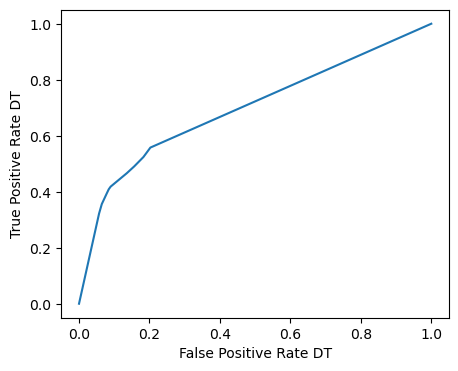

In [39]:
# Compute ROC curve DT
fpr_dt, tpr_dt, thresholds_dt = roc_curve(
    y_test_User, # the true class
    y_pred_proba_dt[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve DT
plt.figure(figsize = [5, 4])
plt.plot(fpr_dt, tpr_dt, '-')
plt.xlabel('False Positive Rate DT')
plt.ylabel('True Positive Rate DT')
plt.show()

## RANDOM FOREST


In [40]:
param_dict_rf = {
    'rf__n_estimators': [200,250,300,350],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': range(5, 10),
    'rf__criterion': ['gini', 'entropy'],
    'select__k': range(1,18),  # Parameter for SelectKBest
}

clf_rf = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('rf', RandomForestClassifier())
])

In [41]:
max_iter = 100
grid_clf_rf = RandomizedSearchCV(
    estimator=clf_rf,
    param_distributions=param_dict_rf,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=1
)

grid_clf_rf.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x174479d00>)),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': range(5, 10),
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__n_estimators': [200, 250, 300,
                                                             350],
                                        'select__k': range(1, 18)},
                   scoring='f1_weighted', verbose=1)

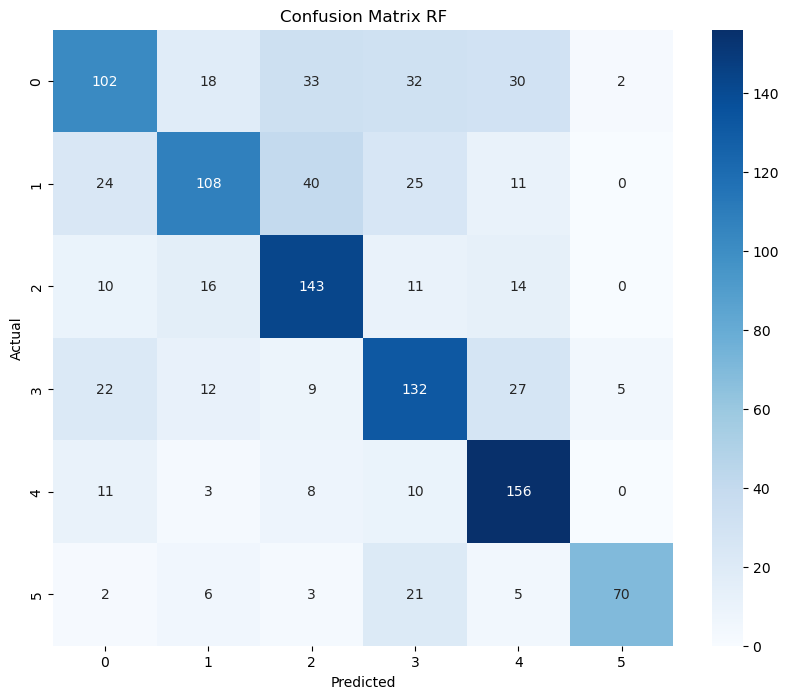

In [42]:
# Predict categories for testing dataset RF
y_pred_rf = grid_clf_rf.predict(X_test_User)
y_pred_proba_rf = grid_clf_rf.predict_proba(X_test_User)

# Create the confusion matrix for RF
cm_rf = confusion_matrix(y_test_User, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [43]:
print("Classification report Random Forest : ")
print(classification_report(y_test_User, y_pred_rf))
print()

Classification report Random Forest : 
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       217
           1       0.66      0.52      0.58       208
           2       0.61      0.74      0.67       194
           3       0.57      0.64      0.60       207
           4       0.64      0.83      0.72       188
           5       0.91      0.65      0.76       107

    accuracy                           0.63      1121
   macro avg       0.66      0.64      0.64      1121
weighted avg       0.64      0.63      0.63      1121




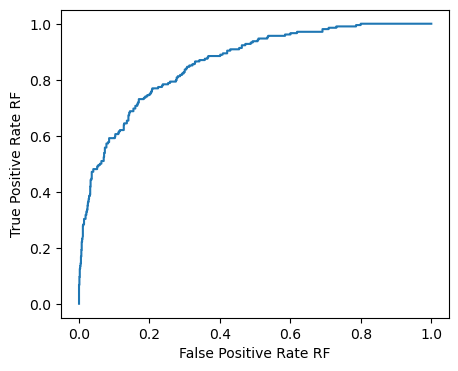

In [44]:
# Compute ROC curve RF
fpr_rf, tpr_rf, thresholds_rf = roc_curve(
    y_test_User, # the true class
    y_pred_proba_rf[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve RF
plt.figure(figsize = [5, 4])
plt.plot(fpr_rf, tpr_rf, '-')
plt.xlabel('False Positive Rate RF')
plt.ylabel('True Positive Rate RF')
plt.show()

We found that the most efficient algortihm is : 

### 6. Apply models to see which one fits the best for Year

Now that we have created the first model for predicting the user. we are going to create 6 models for predicting the year for each user.

In [45]:
#  Create 6 data frames for each user
# Group data by 'User' column and create a dictionary of DataFrames for each user
user_data = {}
# drop NA values 
data_copy.dropna(inplace=True)
# Remove duplicates for the mixed_playlist
data_copy.drop_duplicates(inplace=True)

known_data_copy = data_copy[data_copy['user'] != 'unknown']

users_list = known_data_copy['user'].unique()

delta_data= known_data_copy[known_data_copy['user'] == users_list[0]]
gamma_data = known_data_copy[known_data_copy['user'] == users_list[1]]
alpha_data = known_data_copy[known_data_copy['user'] == users_list[2]]
zeta_data = known_data_copy[known_data_copy['user'] == users_list[3]]
beta_data = known_data_copy[known_data_copy['user'] == users_list[4]]
epsilon_data = known_data_copy[known_data_copy['user'] == users_list[5]]


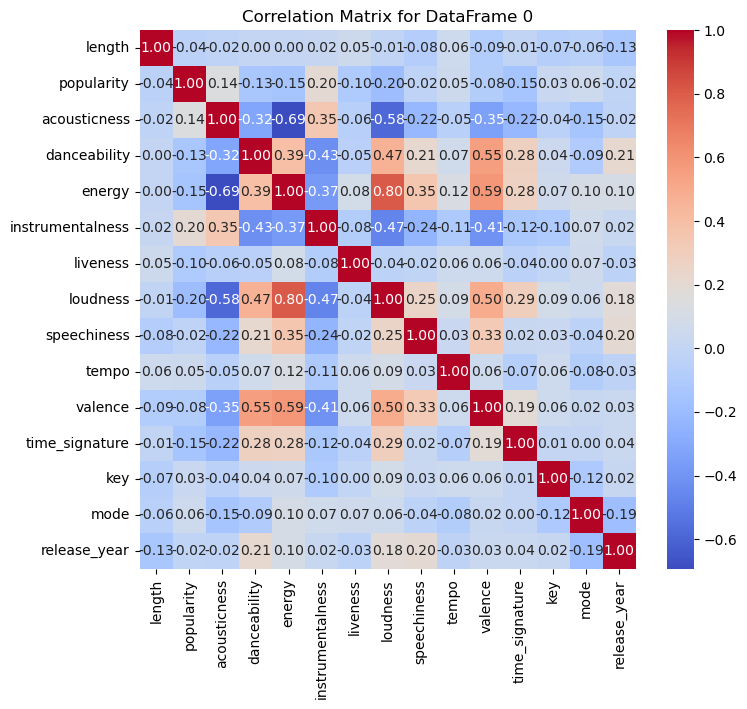

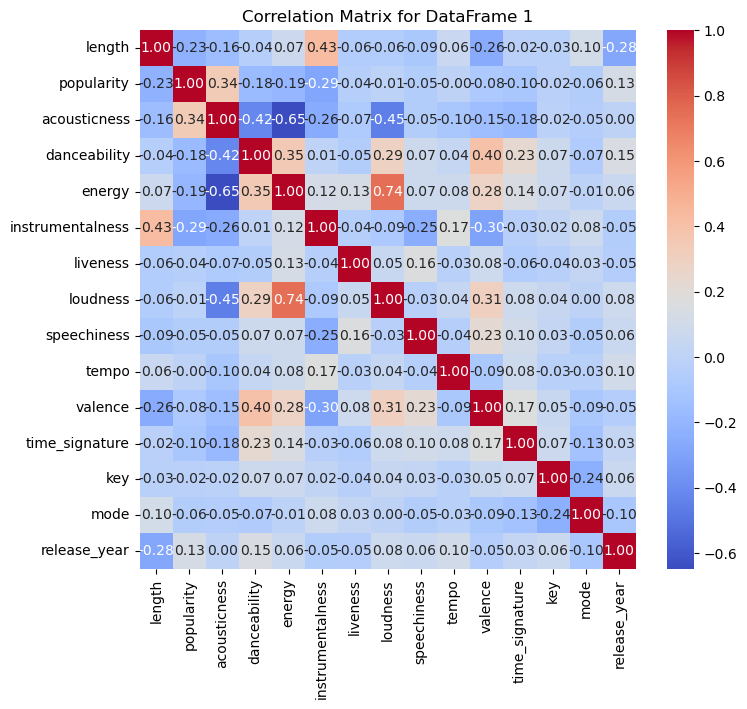

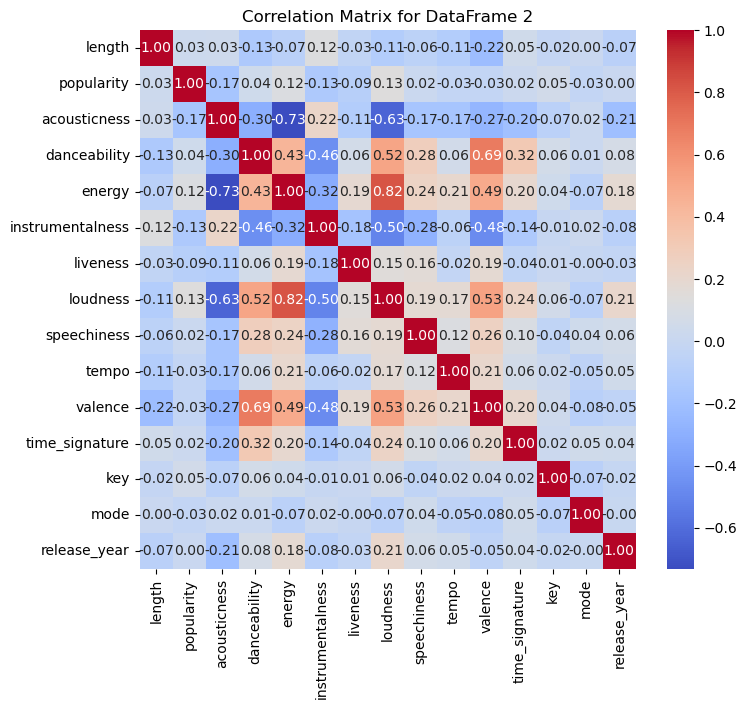

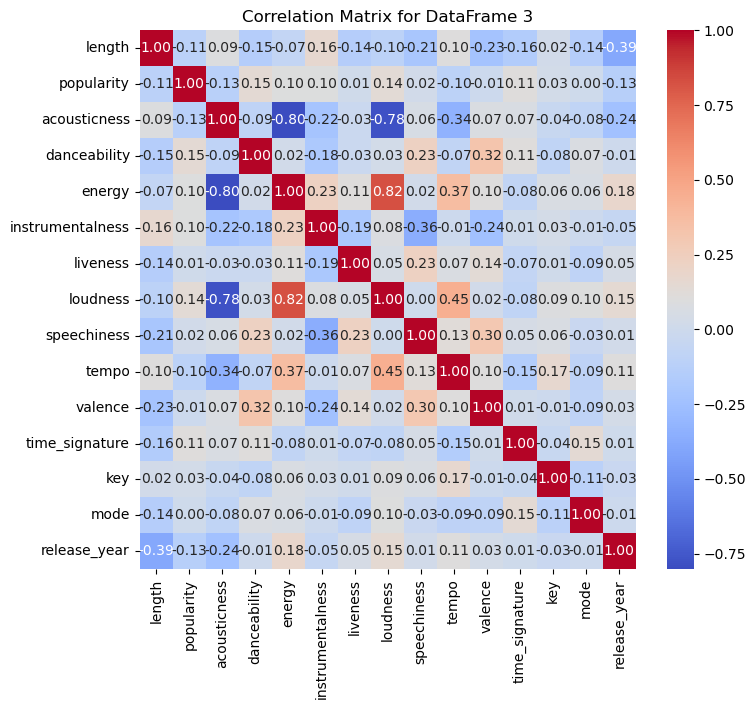

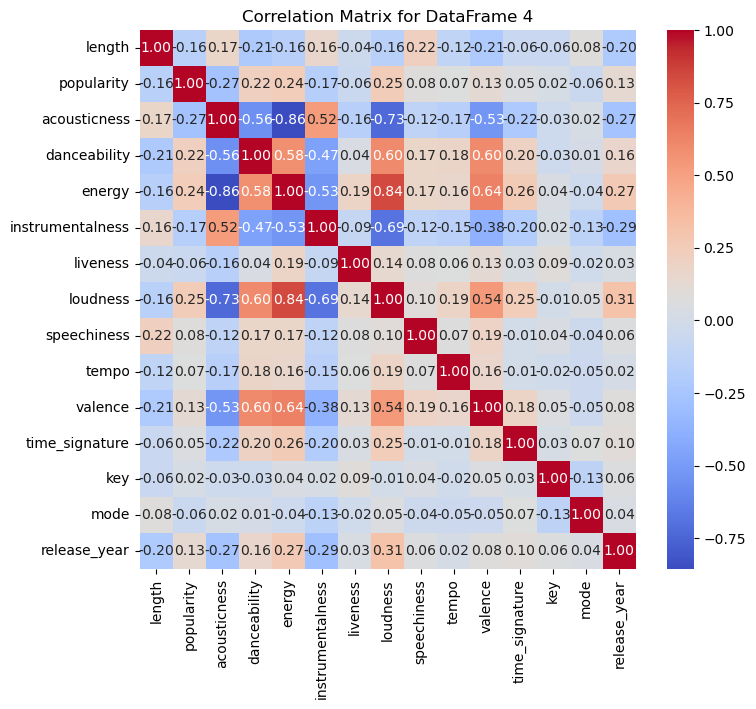

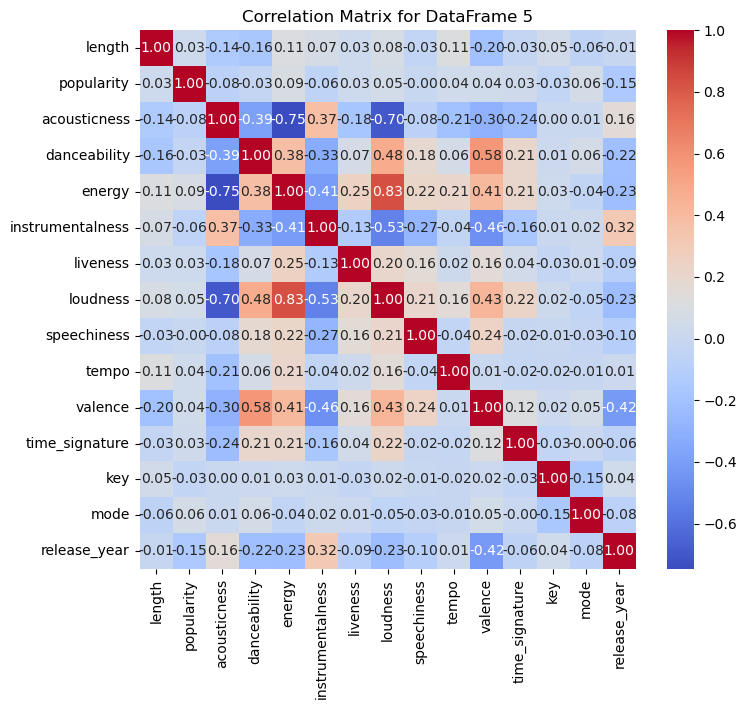

In [46]:
# Save each data frame in a list, in order to loop all lists and create the models
data_list = [delta_data, gamma_data, alpha_data, zeta_data, beta_data, epsilon_data]

# Create a heatmap for every user
for i, data in enumerate(data_list):
    corr = data.corr(numeric_only=True)
    plt.figure(figsize=(8,7))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for DataFrame {i}")
    plt.show()

In general, the feature loudness has a strong correlation with the energy feature, so we are going to remove loudness

In [47]:
# Assuming data_list is a list of pandas DataFrames
column_to_delete = 'loudness'
for i, data in enumerate(data_list):
    # Check if the column exists in the dataframe
    if column_to_delete in data.columns:
        # Delete the column and create a new DataFrame
        data_list[i] = data.drop(column_to_delete, axis=1)

    # Make sure 'name', 'artist', and 'album' columns exist before transforming
    if 'name' in data.columns:
        data_list[i]['name'] = label_encoder.fit_transform(data['name'])
    if 'artist' in data.columns:
        data_list[i]['artist'] = label_encoder.fit_transform(data['artist'])
    if 'album' in data.columns:
        data_list[i]['album'] = label_encoder.fit_transform(data['album'])

In [48]:
# Function to remove outliers from specified columns in each DataFrame
def remove_outliers(data_list, columns_to_check, threshold=3):
    for i, data in enumerate(data_list):
        for column in columns_to_check:
            if column in data.columns:
                z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
                data_list[i] = data[(z_scores < threshold)]
    return data_list

# Specify columns and call the function to remove outliers
columns_to_check = ['name','artist','album','length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode'] # Specify columns to check for outliers
data_list = remove_outliers(data_list, columns_to_check)

Now, its time to create the models for each user, for this part we are going to use a for loop and for each iteratiion we are going to create the target and feature values. And then we are going to apply a random forest algorithm since this one had very good results in the first part

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

Best hyper-parameters: {'select__k': 9, 'rf__n_estimators': 200, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__criterion': 'entropy'}
Best score: 0.3388655123432059


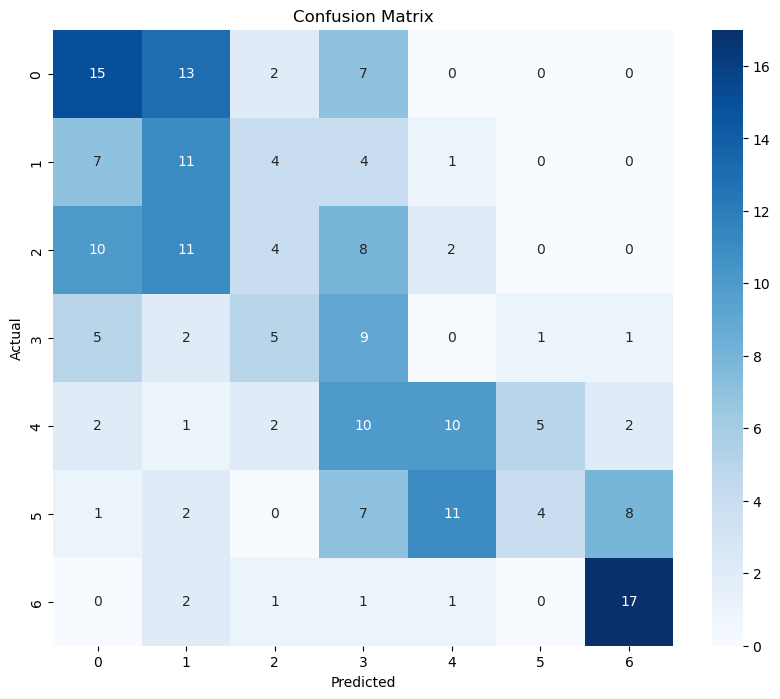

              precision    recall  f1-score   support

           0       0.38      0.41      0.39        37
           1       0.26      0.41      0.32        27
           2       0.22      0.11      0.15        35
           3       0.20      0.39      0.26        23
           4       0.40      0.31      0.35        32
           5       0.40      0.12      0.19        33
           6       0.61      0.77      0.68        22

    accuracy                           0.33       209
   macro avg       0.35      0.36      0.33       209
weighted avg       0.35      0.33      0.32       209

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 15, 'rf__n_estimators': 350, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__criterion': 'entropy'}
Best score: 0.35137932340947375


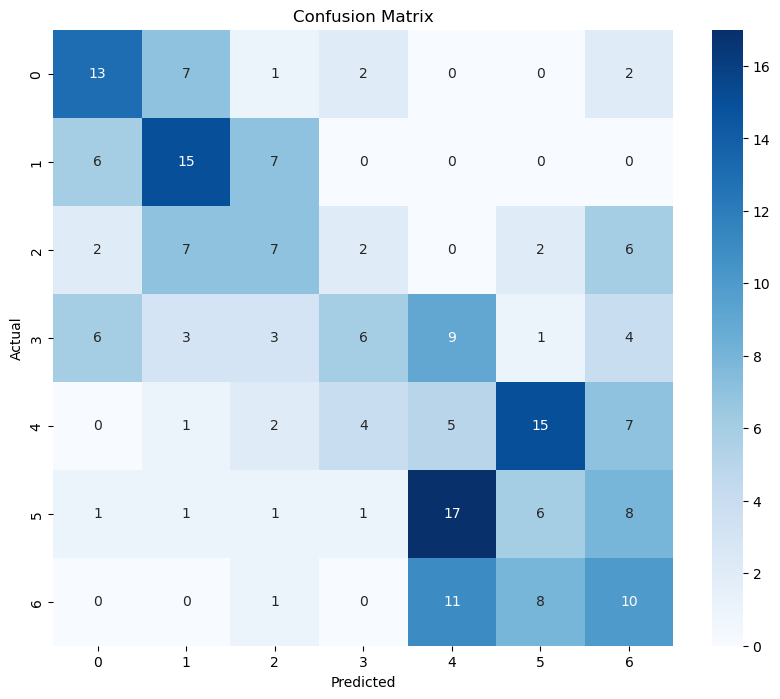

              precision    recall  f1-score   support

           0       0.46      0.52      0.49        25
           1       0.44      0.54      0.48        28
           2       0.32      0.27      0.29        26
           3       0.40      0.19      0.26        32
           4       0.12      0.15      0.13        34
           5       0.19      0.17      0.18        35
           6       0.27      0.33      0.30        30

    accuracy                           0.30       210
   macro avg       0.31      0.31      0.30       210
weighted avg       0.30      0.30      0.29       210

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 16, 'rf__n_estimators': 350, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__criterion': 'entropy'}
Best score: 0.4309215849469301


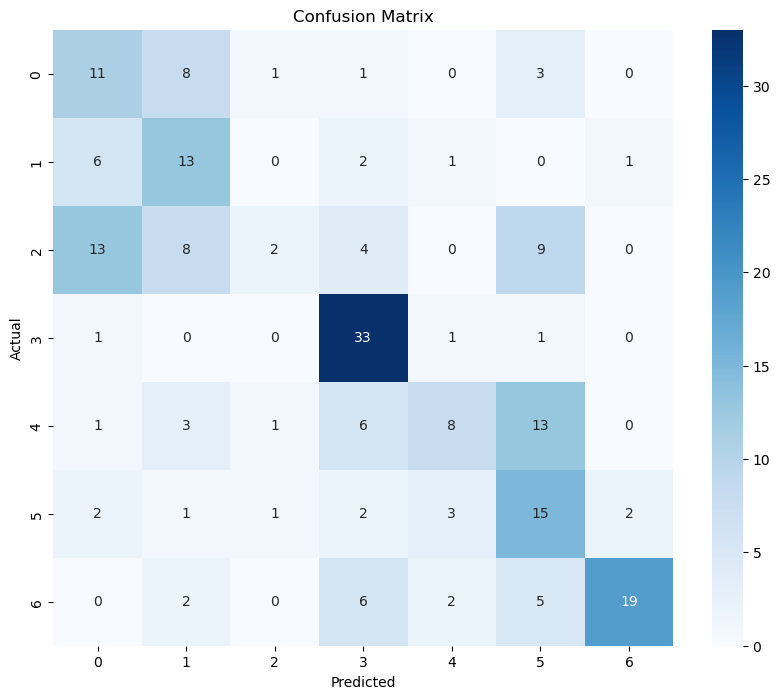

              precision    recall  f1-score   support

           0       0.32      0.46      0.38        24
           1       0.37      0.57      0.45        23
           2       0.40      0.06      0.10        36
           3       0.61      0.92      0.73        36
           4       0.53      0.25      0.34        32
           5       0.33      0.58      0.42        26
           6       0.86      0.56      0.68        34

    accuracy                           0.48       211
   macro avg       0.49      0.48      0.44       211
weighted avg       0.51      0.48      0.45       211

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

Best hyper-parameters: {'select__k': 16, 'rf__n_estimators': 300, 'rf__max_features': 'sqrt', 'rf__max_depth': 6, 'rf__criterion': 'gini'}
Best score: 0.6065437167206069


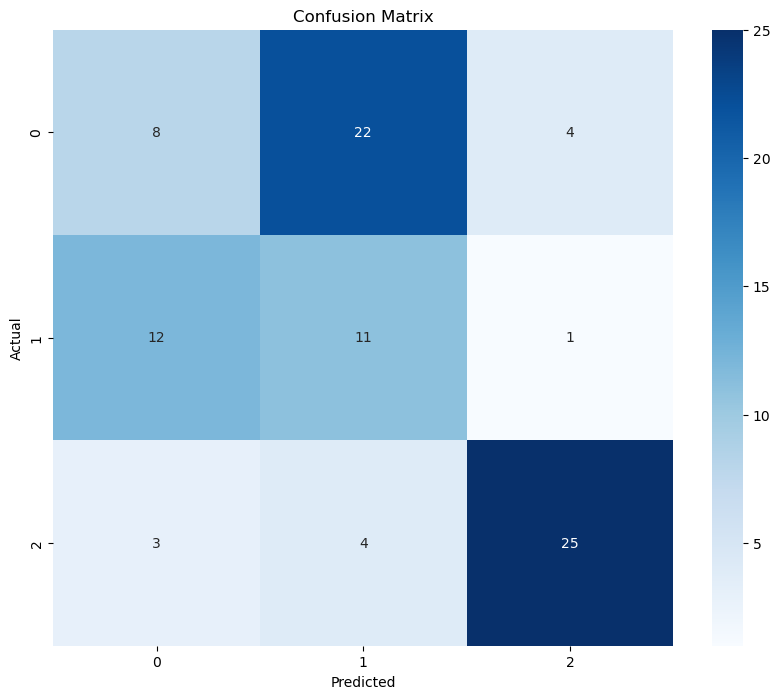

              precision    recall  f1-score   support

           4       0.35      0.24      0.28        34
           5       0.30      0.46      0.36        24
           6       0.83      0.78      0.81        32

    accuracy                           0.49        90
   macro avg       0.49      0.49      0.48        90
weighted avg       0.51      0.49      0.49        90

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 17, 'rf__n_estimators': 350, 'rf__max_features': 'sqrt', 'rf__max_depth': 8, 'rf__criterion': 'gini'}
Best score: 0.5371648300601578


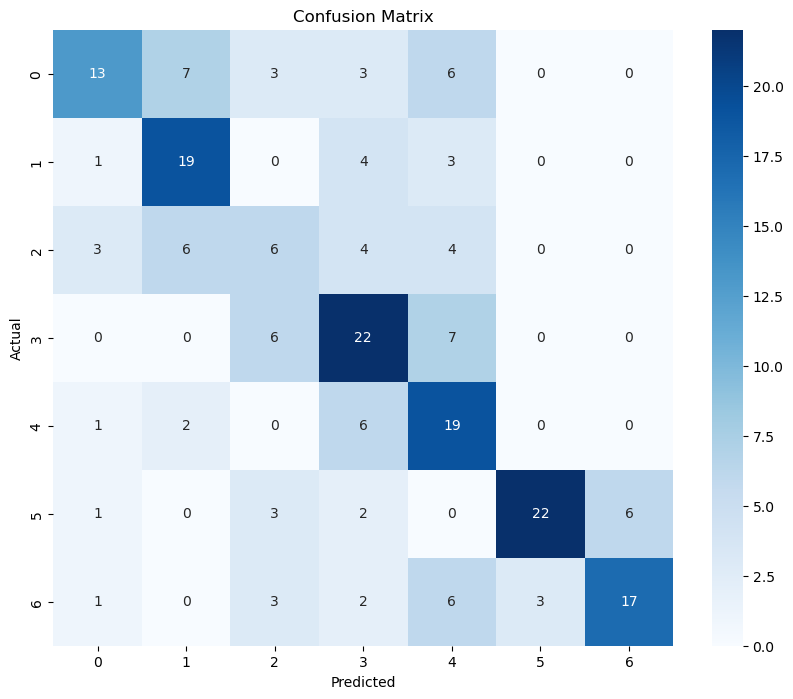

              precision    recall  f1-score   support

           0       0.65      0.41      0.50        32
           1       0.56      0.70      0.62        27
           2       0.29      0.26      0.27        23
           3       0.51      0.63      0.56        35
           4       0.42      0.68      0.52        28
           5       0.88      0.65      0.75        34
           6       0.74      0.53      0.62        32

    accuracy                           0.56       211
   macro avg       0.58      0.55      0.55       211
weighted avg       0.60      0.56      0.56       211

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

Best hyper-parameters: {'select__k': 8, 'rf__n_estimators': 300, 'rf__max_features': 'log2', 'rf__max_depth': 7, 'rf__criterion': 'gini'}
Best score: 0.4387547364366265


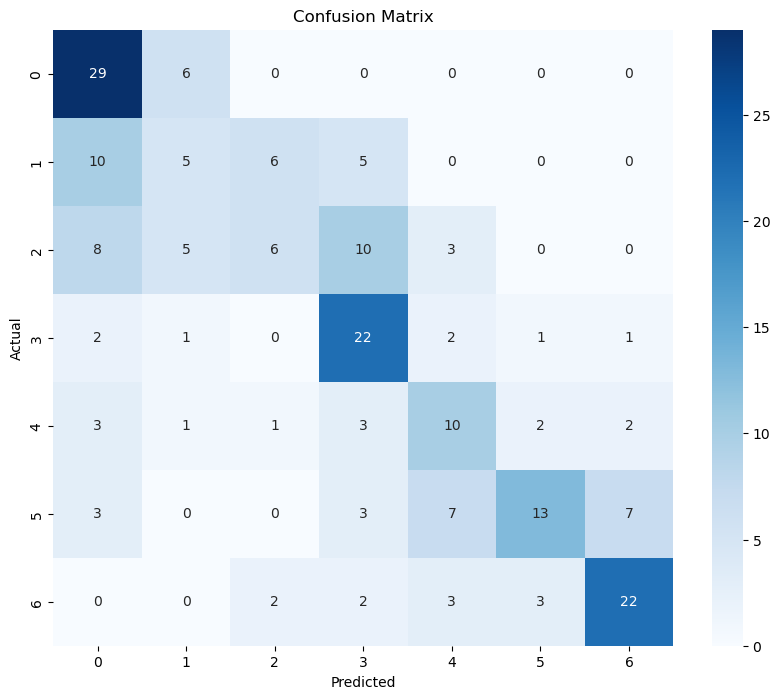

              precision    recall  f1-score   support

           0       0.53      0.83      0.64        35
           1       0.28      0.19      0.23        26
           2       0.40      0.19      0.26        32
           3       0.49      0.76      0.59        29
           4       0.40      0.45      0.43        22
           5       0.68      0.39      0.50        33
           6       0.69      0.69      0.69        32

    accuracy                           0.51       209
   macro avg       0.50      0.50      0.48       209
weighted avg       0.51      0.51      0.49       209



In [49]:
# Create a list in which the we are going to save the fit model for each user
grid_clf_rf_list = []
# Create a list to save the best score of the model for each user
best_scores_list = []

# for loop for each model 
for i, data in enumerate(data_list):   
    # Create the target values 
    target_TopYear_user = pd.Series(data["top_year"])
    target_TopYear_user.replace(year_mapping, inplace=True)
    #Create the feature_df with only numerical data    
    feature_df_user = data.drop(columns = ['release_date','uri','top_year','user'])
    # Split the dataset into testing and training part
    X_train_User, X_test_User, y_train_User, y_test_User = train_test_split(
        feature_df_user.values,
        target_TopYear_user.values,
        train_size = 0.7,
        shuffle = True,
    )
    # Create pipeline
    clf_rf = Pipeline([
        ('select', SelectKBest(score_func=f_regression)),
        ('rf', RandomForestClassifier())
    ])
    # Define a max number of iterations
    max_iter = 100
    # Use the RandomizedSearchCV

    grid_clf_rf = RandomizedSearchCV(
        estimator=clf_rf,
        param_distributions=param_dict_rf,
        scoring='f1_weighted',
        n_iter=max_iter,
        refit=True,
        cv=3,
        verbose=1
    )
    # Save the model in the grid_clf_rf_list
    grid_clf_rf_list.append(grid_clf_rf.fit(X_train_User, y_train_User))
    # Save the best results in the best_scores_list
    best_scores_list.append(grid_clf_rf.best_score_)
    print('Best hyper-parameters:', grid_clf_rf.best_params_)
    print('Best score:', grid_clf_rf.best_score_)
    
    # Predict categories for testing dataset RF
    y_pred_rf = grid_clf_rf.predict(X_test_User)
    y_pred_proba_rf = grid_clf_rf.predict_proba(X_test_User)

    # Create the confusion matrix
    cm_rf = confusion_matrix(y_test_User, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(
        confusion_matrix = cm_rf,
        display_labels = ['alpha', 'beta', 'delta', 'epsilon', 'gamma', 'dzeta']
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test_User, y_pred_rf))

In [50]:
# Print the best score for each user
combined_lists = zip(users_list, best_scores_list)
for position, values in enumerate(combined_lists):
    print(f"Best score: {values}")


Best score: ('delta', 0.3388655123432059)
Best score: ('gamma', 0.35137932340947375)
Best score: ('alpha', 0.4309215849469301)
Best score: ('dzeta', 0.6065437167206069)
Best score: ('beta', 0.5371648300601578)
Best score: ('epsilon', 0.4387547364366265)


In [51]:
# Assign the model of the list to each user
grid_clf_knn_delta = grid_clf_rf_list[0]
grid_clf_knn_gamma = grid_clf_rf_list[1]
grid_clf_knn_alpha = grid_clf_rf_list[2]
grid_clf_knn_zeta = grid_clf_rf_list[3]
grid_clf_knn_beta = grid_clf_rf_list[4]
grid_clf_knn_epsilon = grid_clf_rf_list[5]

## 7.  Reconstructing playlist

In [52]:
# Load the new dataset
data1 = pd.read_csv('data/mixed_playlist.csv')

# Filter unknown
df_unknown = data1[(data1["top_year"] == "unknown") | (data1["user"] == "unknown")]


In [53]:
# Prepoccess like the training dataset
# Use the label encoder to encode name, artiste and albums
df_unknown_copy = df_unknown.copy()
df_unknown_copy['name'] = label_encoder.fit_transform(df_unknown_copy['name'])
df_unknown_copy['artist'] = label_encoder.fit_transform(df_unknown_copy['artist'])
df_unknown_copy['album'] = label_encoder.fit_transform(df_unknown_copy['album'])
df_unknown_copy.drop(columns = ['release_date',"loudness", 'uri','user','top_year'],inplace = True)

In [54]:
#New prediction 
df_predictUser = grid_clf_knn.predict(df_unknown_copy.values)

In [55]:
df_predictUser2 = pd.Series(df_predictUser)

# Invert the user-year mapping dictionary
reverse_mapping_User = {v: k for k, v in user_mapping.items()}

user_predict = df_predictUser2.map(reverse_mapping_User)
user_predict.head()

0       beta
1      gamma
2       beta
3    epsilon
4       beta
dtype: object

In [56]:
# Reset the index in order to assign values
df_resetIndex = df_unknown.reset_index(drop=True)

In [57]:
# Create the original dataframe
result_User = df_resetIndex.copy()
result_User["user"] = user_predict
result_User.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.996,0.329,0.00695,0.866,...,0.0448,70.295,0.2380,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,beta
1,For J√≥hann,Bach Reworks (Pt. 1),V√≠kingur √ìlafsson,05/10/2018,183773,22,0.994,0.629,0.09140,0.947,...,0.0406,111.454,0.2410,4,0,0,spotify:track:5BzsTKLEKQMDhPwbCZOrn5,2018,unknown,gamma
2,"Concerto For Piano And Orchestra In G, Second ...",Gershwin's World,Herbie Hancock,01/01/1998,551666,20,0.981,0.208,0.09940,0.919,...,0.0342,62.543,0.0420,4,4,1,spotify:track:4rL06iWdtarlSqlxgU2N14,1998,unknown,beta
3,This Reminds You - Satie Remix,Shadows,Remy Van Kesteren,15/02/2019,321146,26,0.870,0.258,0.05890,0.898,...,0.0381,98.874,0.0378,4,5,0,spotify:track:3rruI72VDoIINSuAhryTOL,2019,unknown,epsilon
4,Sull Lull,Madar,Jan Garbarek,1992,1009706,27,0.913,0.502,0.30400,0.857,...,0.0473,105.740,0.5590,4,7,0,spotify:track:3DzBR3hE8hzutFqlB1jjmk,1992,unknown,beta


In [58]:
# Use the label encoder to encode name, artist, and albums
df_unknown_year = result_User.copy()
df_unknown_year['name'] = label_encoder.fit_transform(df_unknown_year['name'])
df_unknown_year['artist'] = label_encoder.fit_transform(df_unknown_year['artist'])
df_unknown_year['album'] = label_encoder.fit_transform(df_unknown_year['album'])

# Filter by user
df_unknown_year_alpha = df_unknown_year[df_unknown_year["user"] == "alpha"].copy()
df_unknown_year_beta = df_unknown_year[df_unknown_year["user"] == "beta"].copy()
df_unknown_year_delta = df_unknown_year[df_unknown_year["user"] == "delta"].copy()
df_unknown_year_epsilon = df_unknown_year[df_unknown_year["user"] == "epsilon"].copy()
df_unknown_year_gamma = df_unknown_year[df_unknown_year["user"] == "gamma"].copy()
df_unknown_year_zeta = df_unknown_year[df_unknown_year["user"] == "dzeta"].copy()  

# Drop columns
columns_to_drop = ['release_date', 'loudness', 'uri', 'user', 'top_year']
df_unknown_year_alpha.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_beta.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_delta.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_epsilon.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_gamma.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_zeta.drop(columns=columns_to_drop, inplace=True)

#Example for zeta
df_unknown_year_zeta

,name,album,artist,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,time_signature,key,mode,release_year
21,20,42,22,323273,16,0.270,0.609,0.494,0.900,0.097,0.0436,124.316,0.748,4,0,1,2022
71,90,87,45,401266,38,0.258,0.671,0.617,0.855,0.883,0.0394,140.024,0.547,4,8,1,2003


In [59]:
#New prediction 
df_predict_year_alpha = grid_clf_knn_alpha.predict(df_unknown_year_alpha.values)
df_predict_year_beta = grid_clf_knn_beta.predict(df_unknown_year_beta.values)
df_predict_year_delta = grid_clf_knn_delta.predict(df_unknown_year_delta.values)
df_predict_year_epsilon = grid_clf_knn_epsilon.predict(df_unknown_year_epsilon.values)
df_predict_year_gamma = grid_clf_knn_gamma.predict(df_unknown_year_gamma.values)
df_predict_year_zeta = grid_clf_knn_zeta.predict(df_unknown_year_zeta.values)

In [60]:
#Transform to series in order to reverse the mapping 
df_predict_ya = pd.Series(df_predict_year_alpha)
df_predict_yb = pd.Series(df_predict_year_beta)
df_predict_yd = pd.Series(df_predict_year_delta)
df_predict_ye = pd.Series(df_predict_year_epsilon)
df_predict_yg = pd.Series(df_predict_year_gamma)
df_predict_yz = pd.Series(df_predict_year_zeta)

# Invert the year mapping dictionary
reverse_mapping = {v: k for k, v in year_mapping.items()}

year_alpha = df_predict_ya.map(reverse_mapping)
year_beta = df_predict_yb.map(reverse_mapping)
year_delta = df_predict_yd.map(reverse_mapping)
year_epsilon = df_predict_ye.map(reverse_mapping)
year_gamma = df_predict_yg.map(reverse_mapping)
year_zeta = df_predict_yz.map(reverse_mapping)

In [61]:
df_final_year = result_User.copy()

# Filter by user and create copies 
df_final_year_alpha = df_final_year[df_final_year["user"] == "alpha"].copy()
df_final_year_beta = df_final_year[df_final_year["user"] == "beta"].copy()
df_final_year_delta = df_final_year[df_final_year["user"] == "delta"].copy()
df_final_year_epsilon = df_final_year[df_final_year["user"] == "epsilon"].copy()
df_final_year_gamma = df_final_year[df_final_year["user"] == "gamma"].copy()
df_final_year_zeta = df_final_year[df_final_year["user"] == "dzeta"].copy()

#Assign values Alpha
df_final_alpha = df_final_year_alpha.reset_index(drop=True)
df_final_alpha["top_year"] = year_alpha

#Assign values Beta
df_final_beta = df_final_year_beta.reset_index(drop=True)
df_final_beta["top_year"] = year_beta

#Assign values Delta
df_final_delta = df_final_year_delta.reset_index(drop=True)
df_final_delta["top_year"] = year_delta

#Assign values Epsilon
df_final_epsilon = df_final_year_epsilon.reset_index(drop=True)
df_final_epsilon["top_year"] = year_epsilon

#Assign values Gamma
df_final_gamma = df_final_year_gamma.reset_index(drop=True)
df_final_gamma["top_year"] = year_gamma

#Assign values Zeta
df_final_zeta = df_final_year_zeta.reset_index(drop=True)
df_final_zeta["top_year"] = year_zeta

In [62]:
#Concat the known data and predict data
df_known2 = data1[(data1["top_year"] != "unknown") | (data1["user"] != "unknown")]
df_final = pd.concat([df_known2,df_final_alpha,df_final_beta,df_final_delta,df_final_epsilon,df_final_gamma,df_final_zeta])

#Reset the index
df_final.reset_index(drop=True,inplace=True)


In [63]:
#Reconstruct all the files

# Users and their respective years
users_years = {
    'alpha': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'beta': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'delta': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'epsilon': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'gamma': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'dzeta': ["2020", "2021", "2022"]  # Different years for dzeta
}


for user, years in users_years.items():
    # Loop through each year for the user
    for year in years:
        # Filter the DataFrame for the specific user and year
        df_user_year = df_final[(df_final['user'] == user) & (df_final['top_year'] == year)].copy()

        # Construct the file path
        file_path = f"new_data/recovered_data/{user}/user_{user}_year_{year}.csv"

        # Export to CSV
        df_user_year.to_csv(file_path, index=False)
        print(f"Exported {user}'s data for {year} to {file_path}")


Exported alpha's data for 2016 to new_data/recovered_data/alpha/user_alpha_year_2016.csv
Exported alpha's data for 2017 to new_data/recovered_data/alpha/user_alpha_year_2017.csv
Exported alpha's data for 2018 to new_data/recovered_data/alpha/user_alpha_year_2018.csv
Exported alpha's data for 2019 to new_data/recovered_data/alpha/user_alpha_year_2019.csv
Exported alpha's data for 2020 to new_data/recovered_data/alpha/user_alpha_year_2020.csv
Exported alpha's data for 2021 to new_data/recovered_data/alpha/user_alpha_year_2021.csv
Exported alpha's data for 2022 to new_data/recovered_data/alpha/user_alpha_year_2022.csv
Exported beta's data for 2016 to new_data/recovered_data/beta/user_beta_year_2016.csv
Exported beta's data for 2017 to new_data/recovered_data/beta/user_beta_year_2017.csv
Exported beta's data for 2018 to new_data/recovered_data/beta/user_beta_year_2018.csv
Exported beta's data for 2019 to new_data/recovered_data/beta/user_beta_year_2019.csv
Exported beta's data for 2020 to 